# 1. Import Libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# 2. Load Wine Dataset

In [2]:
wine = load_wine()
X = wine.data
y = wine.target

print("Dataset shape:", X.shape)
print("Feature names:", wine.feature_names)
print("Target classes:", wine.target_names)

Dataset shape: (178, 13)
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']


# 3. Feature Scaling (Clustering works better with scaled data)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply Agglomerative Clustering with Different Linkage Methods

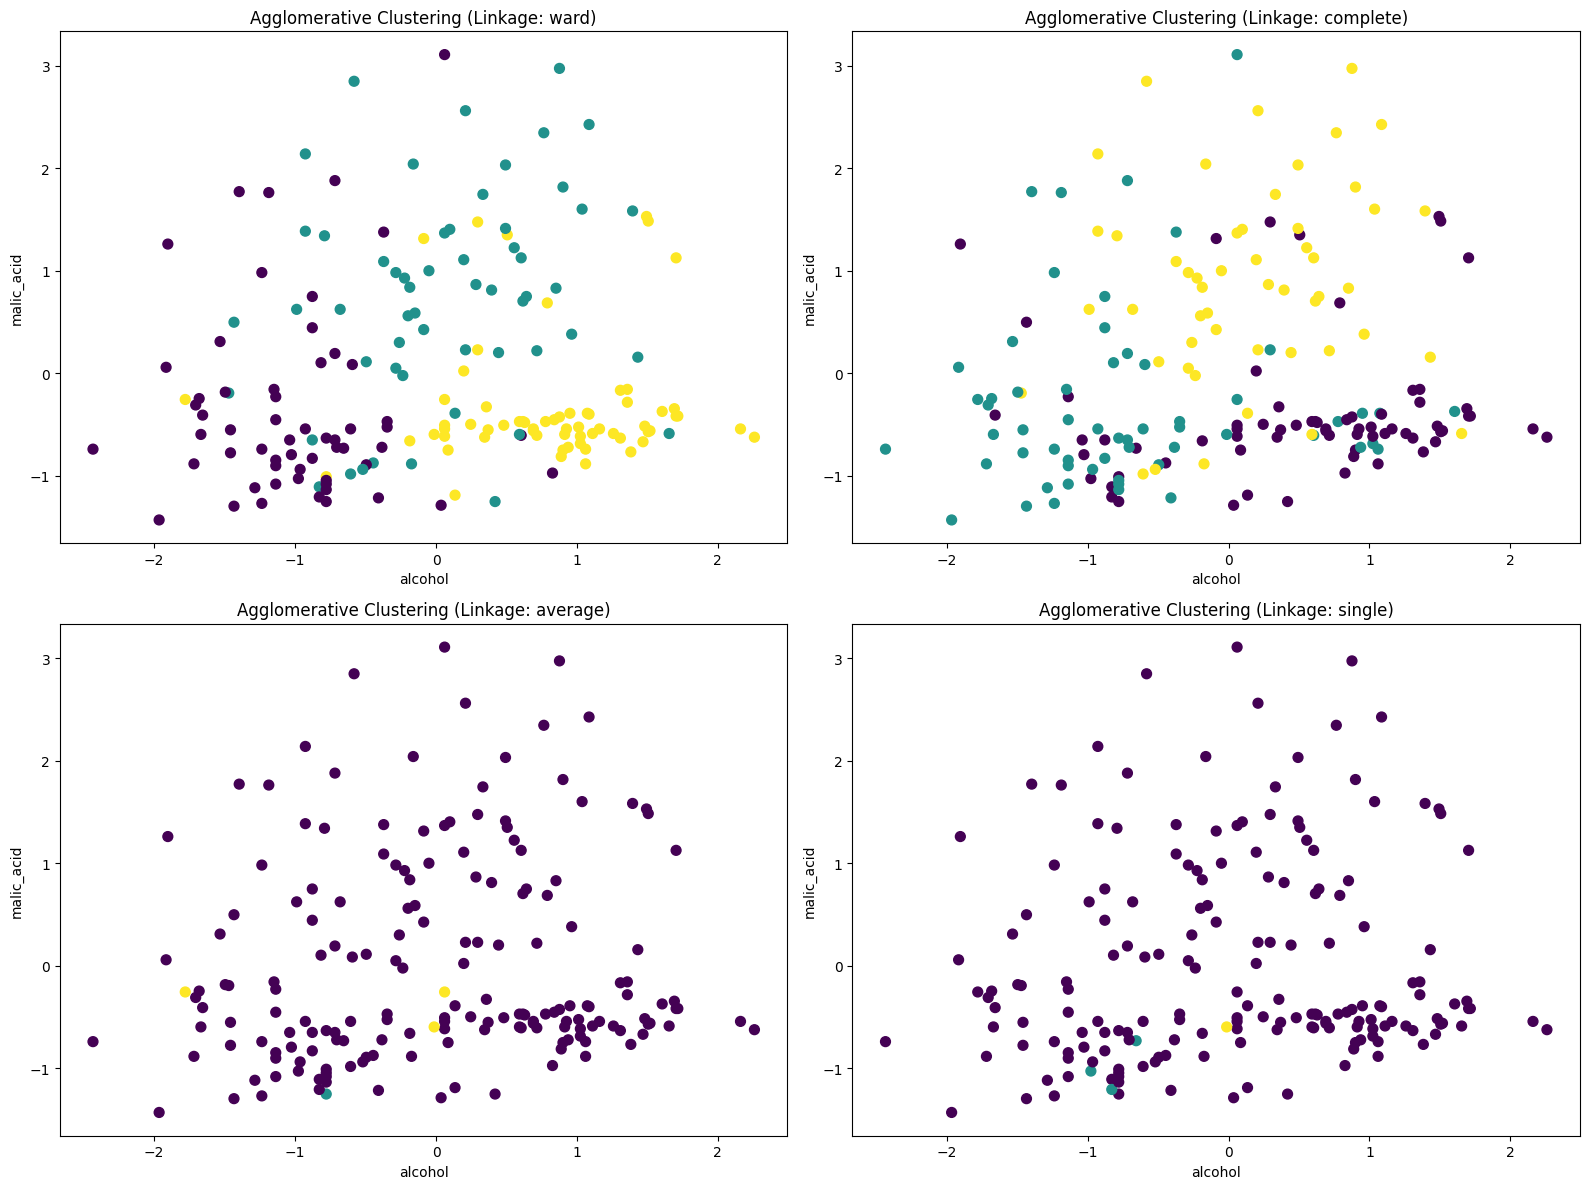

In [4]:
linkages = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(16, 12))
for i, linkage in enumerate(linkages, 1):
    # 'ward' works only with Euclidean distance
    if linkage == 'ward':
        model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    else:
        model = AgglomerativeClustering(n_clusters=3, linkage=linkage, metric='euclidean')

    labels = model.fit_predict(X_scaled)

    # Plot clusters using 2 selected features for visualization
    plt.subplot(2, 2, i)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f"Agglomerative Clustering (Linkage: {linkage})")
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])

plt.tight_layout()
plt.show()